# Project Background - Wine Reviews

This project, and the data used, is based on the dataset called "Wine Reviews" listed on [Kaggle](https://www.kaggle.com/zynicide/wine-reviews/home). 

The dataset contains 14 columns and 130,000 rows of wine reviews and was scraped from [WineEnthusiast](https://www.winemag.com/?s=&drink_type=wine) by Kaggler [zackthoutt](https://www.kaggle.com/zynicide) who was interested in "creating a model that can identify variety, winery, and location of a wine based on a description." 

## My Thoughts
There are already a few notebooks forked addressing this problem. 

## Data Discussion

The dataset contains 14 columns:
* '# Number
* Country: The country that the wine is from
* Description: A few sentences form a sommelier describing the wine's taste, smell, look, feel, etc.
* Designation: The vineyard within the winery where the grapes that made the wine are from. 
* Points: the number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews of wines that score greater than 80).
* Price: The cost for a bottle of wine
* Provice: The state or provice that the wine is from
* Region_1: The growing area in a provice or state 
* Region_2: Sometimes there are more specific regions specific within a wine growing area (can contain NULL Values)
* Taster_name: Name of the person who tasted and reviewed the wine. 
* Taster_twitter_handle: Twitter handle for the person who tasted and reviewed the wine
* Title: The title of the wine review, which often contains the vintage if you're interested in extracted that feature
* Variety: The type of grapes used to make the win (i.e. Pinot Noir)



### Import Libraries

In [99]:
# I like to stash the imports at the top so readers know what dependencies exist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
%matplotlib inline

## Userful Functions
Some Functions I created to clean up some of the code later on

In [100]:
# Simple Function to Find What Data is Missing 
# Input = Some Data
# Transformation = Find the total number of missing Values
# Return Missing Data as a Total Number and as a Percent of The Input
def missingData (data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
    return missing_data

#### Read in the data

In [101]:
df = pd.read_csv('C:/Users\h9067jib\Desktop\project\SemesterDataScienceProject\winemag-data-130k-v2.csv')
df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [102]:
df.shape

(129971, 14)

### Thoughts
We're pretty close to 130k rows of data per the description of the .csv file name

## Data Cleansing

#### Check for Duplicate Data
I want to check for duplicate data -- most likely get rid of it considering this was scraped from a website it might not be clean. I'll check by "Description" because this would be the most unique

In [103]:
df[df.duplicated('description', keep = False)].sort_values('description')

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
67614,67614,US,"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
46540,46540,US,"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
119702,119702,US,"100% Sangiovese, this pale pink wine has notes...",Meadow,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,Rosé,Ross Andrew
72181,72181,US,"100% Sangiovese, this pale pink wine has notes...",Meadow,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,Rosé,Ross Andrew
73731,73731,France,"87-89 Barrel sample. A pleasurable, perfumed w...",Barrel sample,88,NaN,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Lalande-Borie 2008 Barrel sample (Sai...,Bordeaux-style Red Blend,Château Lalande-Borie
100745,100745,France,"87-89 Barrel sample. A pleasurable, perfumed w...",Barrel sample,88,NaN,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Lalande-Borie 2008 Barrel sample (Sai...,Bordeaux-style Red Blend,Château Lalande-Borie
73730,73730,France,87-89 Barrel sample. Minty aromas give lifted ...,Barrel sample,88,NaN,Bordeaux,Saint-Émilion,NaN,Roger Voss,@vossroger,Château Haut-Sarpe 2008 Barrel sample (Saint-...,Bordeaux-style Red Blend,Château Haut-Sarpe
100744,100744,France,87-89 Barrel sample. Minty aromas give lifted ...,Barrel sample,88,NaN,Bordeaux,Saint-Émilion,NaN,Roger Voss,@vossroger,Château Haut-Sarpe 2008 Barrel sample (Saint-...,Bordeaux-style Red Blend,Château Haut-Sarpe
73729,73729,France,87-89 Barrel sample. With its lovely fresh fru...,Barrel sample,88,NaN,Bordeaux,Lalande de Pomerol,NaN,Roger Voss,@vossroger,Château Bertineau Saint-Vincent 2008 Barrel sa...,Bordeaux-style Red Blend,Château Bertineau Saint-Vincent
100743,100743,France,87-89 Barrel sample. With its lovely fresh fru...,Barrel sample,88,NaN,Bordeaux,Lalande de Pomerol,NaN,Roger Voss,@vossroger,Château Bertineau Saint-Vincent 2008 Barrel sa...,Bordeaux-style Red Blend,Château Bertineau Saint-Vincent


## Thoughts 
Over 20k rows are duplicates based on the description. Let's go ahead and drop these values and see what we're left with

In [104]:
df = df.drop_duplicates('description')
df.shape

(119955, 14)

Leaves us with about 120k rows of data

#### Check for NULL Values
I'm also thinking we should see what values are 'NaN' -- Either I'll drop them or impute the data depending on what the feature is. 


In [105]:
print(df.shape)
missingData(df)

(119955, 14)


,Total,Percent
region_2,73195,61.018715
designation,34532,28.787462
taster_twitter_handle,29441,24.543370
taster_name,24912,20.767788
region_1,19558,16.304448
price,8388,6.992622
province,59,0.049185
country,59,0.049185
variety,1,0.000834
winery,0,0.000000


### Thoughts
I'm not too concerned about region_2. I looked into the data and this is more of an optional descriptor. Additionally, I'm not going to worry about the missing twitter handle or twitter name fields for now. Once I get into Feature Engineering, I'll determine if those are useful or not. 

I do need to take care of the missing "price" data. That'll most likely be something we use but I would like to do some EDA first. I can probably drop that Unnamed column though



In [106]:
df = df.drop(columns=['Unnamed: 0'])
df = df.reset_index(drop=True)

## Exploratory Data Analysis (EDA)
Let's have a look at the statistics of the DataFrame

In [107]:
df.describe()

,points,price
count,119955.000000,111567.000000
mean,88.442291,35.620542
std,3.093029,42.107158
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


### Thoughts
The two features we can get statistics on are Points and Price (being that they're continuous values). 

*Points:* Looks like the mean and mediun are roughly the same. The are only between 80-100. I looked into this and the website doesn't post reviews of wines that score less than 80 points.

*Price:* We have a wine that costs $3300. That's definately some walking around money! The standard deviation seems kind of large. Might want to look deeper into this and see if there's more high priced wines skewing this. Referring back to above, About 7 percent of the data is a missing price. I think i'm just going to drop these values for now. I'm more concerned about seeing the price distribution.



In [108]:
# Drop the NaN Prices
df=df.dropna(subset=['price'])
df=df.reset_index(drop=True)
print(df.shape)
missingData(df)

(111567, 13)


,Total,Percent
region_2,65008,58.268126
designation,32050,28.727133
taster_twitter_handle,27751,24.873843
taster_name,23268,20.855629
region_1,18011,16.143663
province,55,0.049298
country,55,0.049298
variety,1,0.000896
winery,0,0.000000
title,0,0.000000


#### Distribution of Price
Because we know points has a relatively normal distrubtion we don't really need to visualize that, but price is probably skewed with some fancy/expensive wines so let's try to visualize the distribution. 


c:\users\h9067jib\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


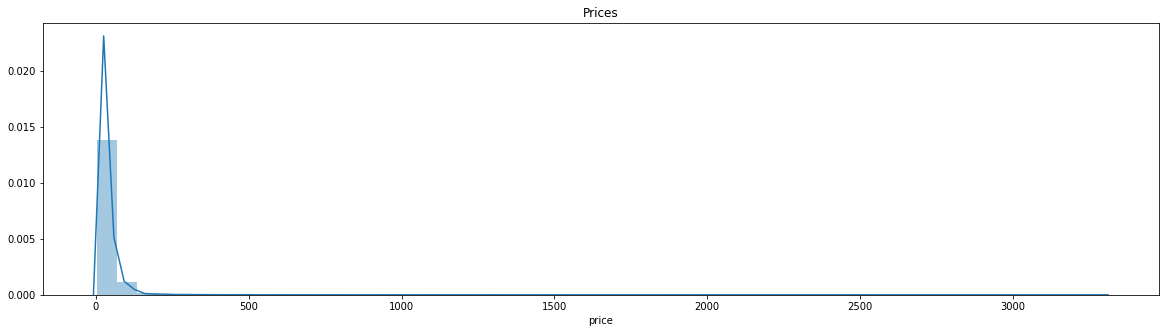

In [109]:
plt.figure(figsize=(20,5))
plt.title("Prices")
x = sns.distplot(df['price'])


### Thoughts
There aren't too many expensive wines but they're definately skewing things. Let's see which ones we can get rid of while we're looking at it. Let's loop through a few calculations to find a sweet spot and drop the expensive wines.

In [110]:
x = 95
while (x < 350):
    percent = df[df['price']>x].shape[0]/df.shape[0]*100
    print(percent, "% of wines are more expensive than ", "$",x,)
    x = x + 10
    
    

3.55660724049226 % of wines are more expensive than  $ 95
2.714064194609517 % of wines are more expensive than  $ 105
2.325956600069913 % of wines are more expensive than  $ 115
1.7639624620183387 % of wines are more expensive than  $ 125
1.4986510348041984 % of wines are more expensive than  $ 135
1.301460109172067 % of wines are more expensive than  $ 145
1.027185458065557 % of wines are more expensive than  $ 155
0.9276936728602544 % of wines are more expensive than  $ 165
0.797726926420895 % of wines are more expensive than  $ 175
0.7412586158989666 % of wines are more expensive than  $ 185
0.6892719173232228 % of wines are more expensive than  $ 195
0.5915727768963941 % of wines are more expensive than  $ 205
0.5593051708838636 % of wines are more expensive than  $ 215
0.5064221499188828 % of wines are more expensive than  $ 225
0.47594718868482616 % of wines are more expensive than  $ 235
0.4481611946184804 % of wines are more expensive than  $ 245
0.38900391692884095 % of wines 

### Thoughts
I'm thinking the sweet spot will be around 255 dollars. With only 0.3890 percent of the wines being greater than 255, we can drop this and see what we have. 

In [111]:
df = df[df.price < 255]
df=df.reset_index(drop=True)
print(df.shape)
missingData(df)

(111127, 13)


,Total,Percent
region_2,64608,58.138886
designation,31888,28.695097
taster_twitter_handle,27676,24.904839
taster_name,23216,20.891413
region_1,17942,16.145491
province,55,0.049493
country,55,0.049493
variety,1,0.000900
winery,0,0.000000
title,0,0.000000


(111127, 13)


c:\users\h9067jib\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


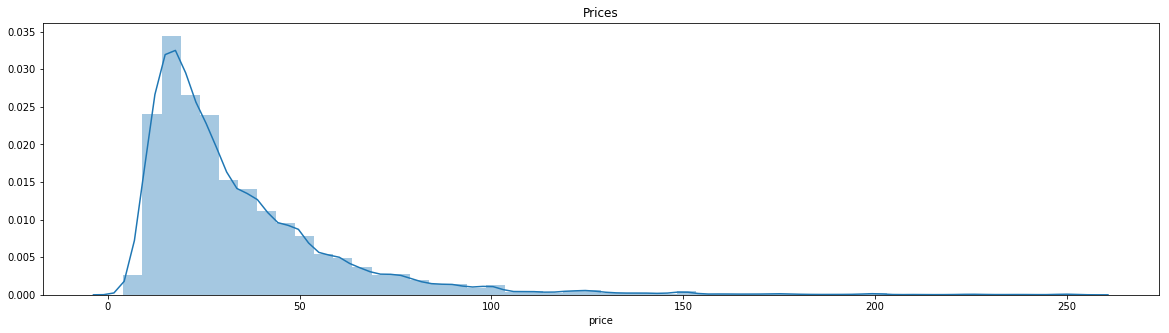

In [116]:
print(df.shape)
plt.figure(figsize=(20,5))
plt.title("Prices")
x = sns.distplot(df['price'])

In [117]:
df.describe()

,points,price
count,111127.000000,111127.000000
mean,88.388960,33.955969
std,3.075421,26.551971
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,253.000000


## Hypothesis Test, Feature Engineering & Model Selection

### Hypothesis Test

### Feature Engineering


### Model Selection

### Machine Learning Model Implementation

### Conclusion and Remarks on Further Development